# Interpretability

- https://shap.readthedocs.io/en/latest/

In [2]:
#!pip install shap

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
import shap

shap.initjs()

In [4]:
X1 = pd.read_csv('X1.csv')
X2 = pd.read_csv('X2.csv')
target = pd.read_csv('target.csv')

In [7]:
# model X1

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data_x1 = pd.read_csv('X1.csv', dtype=np.float64)
target = pd.read_csv('target.csv')

#features = tpot_data.drop('target', axis=1)
training_features_x1, testing_features_x1, training_target_x1, testing_target_x1 = \
            train_test_split(tpot_data_x1, target, random_state=None)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features_x1)
training_features_x1 = imputer.transform(training_features_x1)
testing_features_x1 = imputer.transform(testing_features_x1)

# Average CV score on the training set was: 0.9100745054544891
exported_pipeline_x1 = GradientBoostingClassifier(learning_rate=0.1, max_depth=1, max_features=0.4, 
                                                  min_samples_leaf=4, min_samples_split=19, 
                                                  n_estimators=100, subsample=0.35000000000000003)

exported_pipeline_x1.fit(training_features_x1, training_target_x1)
results_x1 = exported_pipeline_x1.predict(testing_features_x1)

C:\Users\lisannal\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# model X2

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data_x2 = pd.read_csv('X2.csv', dtype=np.float64)
target = pd.read_csv('target.csv')

training_features_x2, testing_features_x2, training_target_x2, testing_target_x2 = \
            train_test_split(tpot_data_x2, target, random_state=None)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features_x2)
training_features_x2 = imputer.transform(training_features_x2)
testing_features_x2 = imputer.transform(testing_features_x2)

# Average CV score on the training set was: 0.90934345410496
exported_pipeline_x2 = make_pipeline(
    RFE(estimator=ExtraTreesClassifier(criterion="entropy", max_features=0.15000000000000002, n_estimators=100), 
        step=0.9000000000000001),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features=0.3, min_samples_leaf=12, 
                               min_samples_split=3, n_estimators=100, subsample=0.4))

exported_pipeline_x2.fit(training_features_x2, training_target_x2)
results_x2 = exported_pipeline_x2.predict(testing_features_x2)

C:\Users\lisannal\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\lisannal\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:323: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X[:, features], y, **fit_params)
C:\Users\lisannal\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model X1

In [13]:
explainer_x1 = shap.TreeExplainer(exported_pipeline_x1)
shap_values_x1 = explainer_x1.shap_values(testing_features_x1)

pd.DataFrame(shap_values_x1).head()

0    1        2    3    4    5    6    7    8         9   ...        50  \
0  0.0  0.0 -0.00397  0.0  0.0  0.0  0.0  0.0  0.0  0.234108  ... -0.010099   
1  0.0  0.0 -0.00397  0.0  0.0  0.0  0.0  0.0  0.0 -0.033039  ... -0.010099   
2  0.0  0.0 -0.00397  0.0  0.0  0.0  0.0  0.0  0.0 -0.033039  ... -0.010099   
3  0.0  0.0 -0.00397  0.0  0.0  0.0  0.0  0.0  0.0 -0.033039  ... -0.010099   
4  0.0  0.0 -0.00397  0.0  0.0  0.0  0.0  0.0  0.0 -0.033039  ... -0.010099   

         51        52   53   54   55   56   57   58   59  
0 -0.024638 -0.021088  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1 -0.247659  0.075729  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2 -0.024638 -0.021088  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3 -0.247659 -0.021088  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.364442  0.075729  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 60 columns]

In [29]:
# add labels
df_testing_x1 = pd.DataFrame(testing_features_x1, columns = X1.columns)

### Global

#### Feature Importances

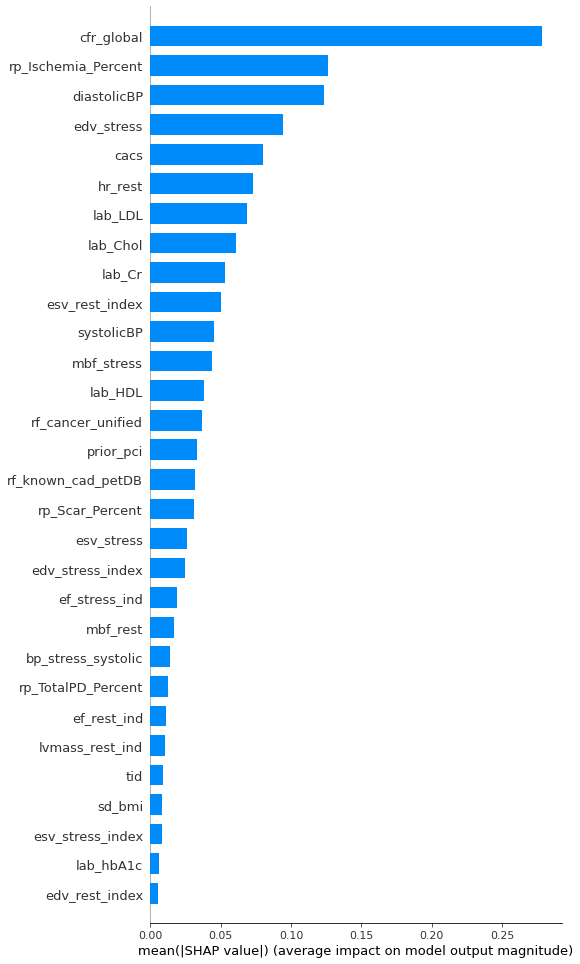

In [55]:
shap.summary_plot(shap_values_x1, df_testing_x1, plot_type="bar", max_display = 30)

#### SHAP Summary Plot

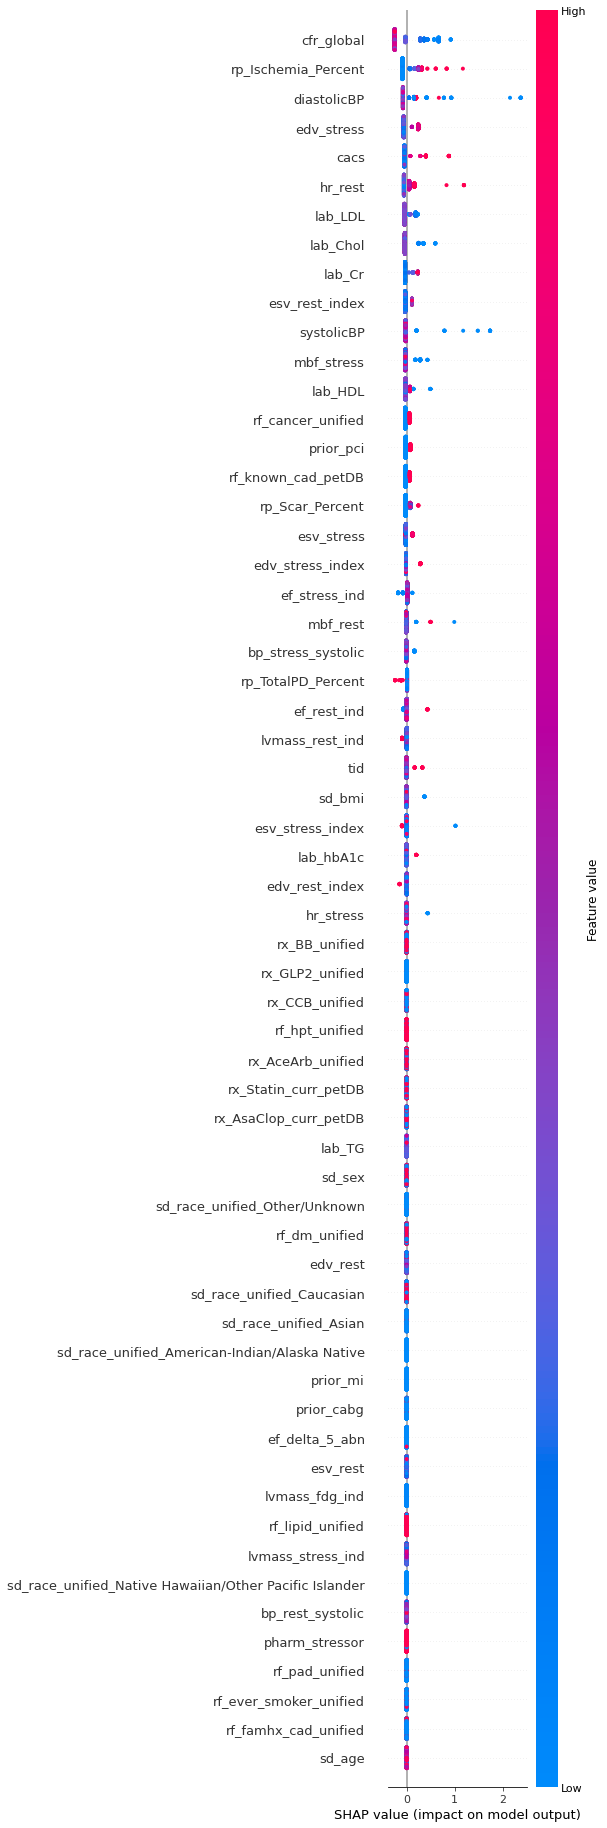

In [39]:
shap.summary_plot(shap_values_x1, df_testing_x1, max_display = 100)

#### PDP

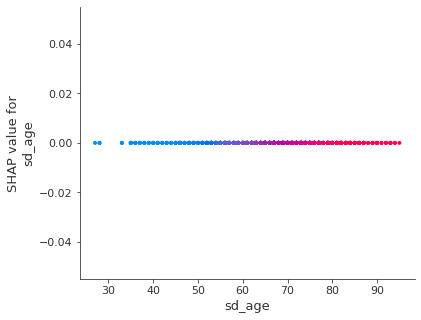

In [40]:
shap.dependence_plot(ind = 'sd_age', interaction_index = 'sd_age',
                     shap_values = shap_values_x1, 
                     features = df_testing_x1)

### Local

In [51]:
# mace predicted as 1
np.where(results_x1 == 1)

(array([ 17, 100, 105, 165, 260, 332, 335, 477, 525, 590, 652, 654, 664,
        724, 919, 966], dtype=int64),)

In [52]:
# actual values as 1
np.where(testing_target_x1 == 1)

(array([  10,   14,   17,   29,   55,   64,   69,   86,   94,  100,  105,
         156,  157,  165,  167,  170,  183,  204,  212,  215,  234,  236,
         249,  260,  332,  334,  335,  362,  398,  407,  438,  447,  493,
         519,  525,  528,  529,  531,  535,  549,  575,  578,  590,  606,
         614,  620,  626,  627,  641,  648,  652,  654,  660,  662,  676,
         680,  690,  707,  724,  780,  800,  801,  802,  813,  826,  840,
         857,  862,  892,  916,  919,  932,  937,  966,  998, 1008, 1012,
        1013, 1074], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [53]:
# predicting when mace = 1
shap.initjs()
shap.force_plot(explainer_x1.expected_value, shap_values_x1[17,:], df_testing_x1.iloc[17,:]) # using index x

In [54]:
# predicting when mace=0
shap.initjs()
shap.force_plot(explainer_x1.expected_value, shap_values_x1[390,:], df_testing_x1.iloc[390,:]) # using index x

In [56]:
shap.initjs()
shap.force_plot(explainer_x1.expected_value, shap_values_x1[:1000,:], df_testing_x1.iloc[:1000,:])

### Group

## Model X2

### Global

#### Feature Importances

#### SHAP Summary Plot

### Local

### Group